<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

In [1]:
# Instituto Tecnológico de Estudios Superiores de Monterrey
## Nagegación autónoma
## MR4010
## Equipo 4
## DETECCION DE PEATONES CON HOG Y SVM
### Andrei García Torres A01793891
### Aurelio Antonio Lozano Rábagp A01081266
### Jorge Luis Tapia Peñaloza A01793013
### Luis Alfredo Negron Naldos A01793865

# DETECCION DE PEATONES CON HOG Y SVM
### https://www.kaggle.com/datasets/tejasvdante/pedestrian-no-pedestrian

# Se cargan las bibliotecas necesarias

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

# Se importan los dos datasets 
### https://docs.python.org/3/library/glob.html

In [3]:
import glob
pedestrian = glob.glob("data_pedestrian/pedestrian/*.jpg")
no_pedestrian = glob.glob("data_pedestrian/no-pedestrian/*.jpg")

In [4]:
len(pedestrian)

631

In [5]:
len(no_pedestrian)

631

# Se muestra una imagen con peatones

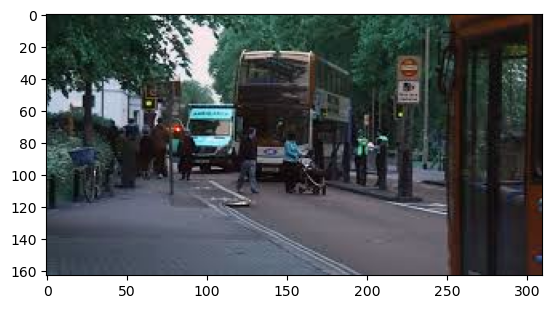

In [6]:
img_color = cv2.imread(pedestrian[74])
plt.imshow(img_color)

In [7]:
width = 400 
height = 250
dim = (width, height)

#resize image
img_resized = cv2.resize(img_color, dim, interpolation = cv2.INTER_AREA)

# Para fines de demostración se calcula el HOG de la imagen

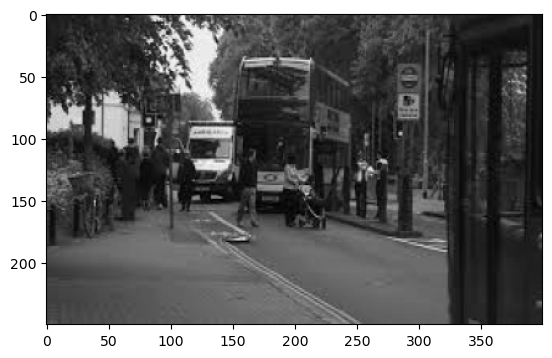

In [8]:
img_gray = cv2.cvtColor(img_resized,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [9]:
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [10]:
features.shape

(14784,)

In [11]:
hog_img.shape

(250, 400)

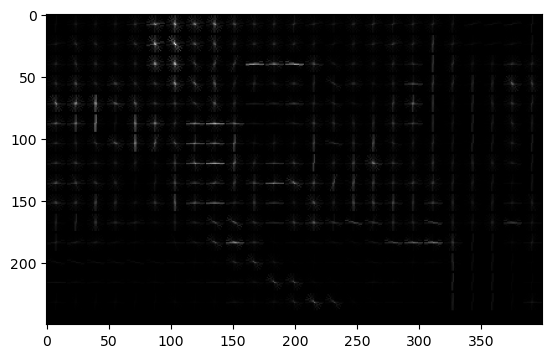

In [12]:
plt.imshow(hog_img,cmap = 'gray')

# Se extraen las features del HOG para ambos tipos de datos

In [13]:
pedestrian_hog_accum = []

for i in pedestrian:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    width = 400 
    height = 250
    dim = (width, height)
    
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    pedestrian_hog_feature, pedestrian_hog_img = hog(img_resized,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    pedestrian_hog_accum.append(pedestrian_hog_feature)

In [14]:
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
y_pedestrian = np.ones(len(X_pedestrian))

In [15]:
X_pedestrian.shape

(631, 14784)

In [16]:
y_pedestrian.shape

(631,)

In [17]:
nopedestrian_hog_accum = []

for i in no_pedestrian:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    width = 400 
    height = 250
    dim = (width, height)
    
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    nopedestrian_hog_feature, nopedestrian_hog_img = hog(img_resized,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    nopedestrian_hog_accum.append(nopedestrian_hog_feature)

In [18]:
X_nopedestrian = np.vstack(nopedestrian_hog_accum).astype(np.float64)
y_nopedestrian = np.zeros(len(X_nopedestrian))

In [19]:
X_nopedestrian.shape

(631, 14784)

In [20]:
y_nopedestrian.shape

(631,)

# Se combinan ambos tipos de datos para alimentar el SVM

In [21]:
X = np.vstack((X_pedestrian,X_nopedestrian))
X.shape

(1262, 14784)

In [22]:
y = np.hstack((y_pedestrian,y_nopedestrian))
y.shape

(1262,)

# Se generan los datos de entrenamiento y de prueba

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
X_train.shape

(883, 14784)

In [25]:
X_test.shape

(379, 14784)

# Se importa el Clasificador y se entrena

In [26]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [27]:
y_predict = svc_model.predict(X_test)

<Axes: >

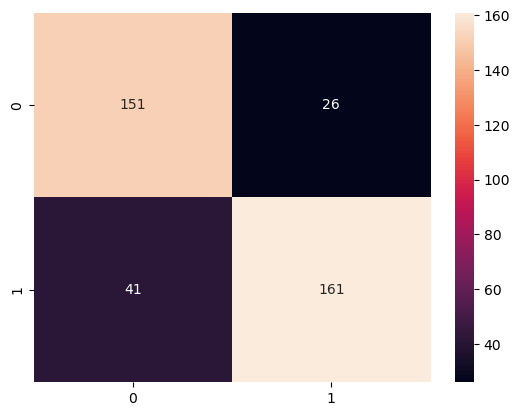

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       177
         1.0       0.86      0.80      0.83       202

    accuracy                           0.82       379
   macro avg       0.82      0.83      0.82       379
weighted avg       0.83      0.82      0.82       379



# GridSearchCV

In [30]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [31]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   9.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=  11.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   8.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=  11.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=   6.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=  12.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   7.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   7.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   9.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.517 total time=   7.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.740 total time=   6.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.520 total time=   9.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.520 total time=   9.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.523 total time=   7.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.523 total time=   8.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.531 total time=   7.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.520 total time=   9.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.525 total time=   7.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.523 total time=   7.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.528 total time=   9.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.774 total time=   6.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.785 total time=   8.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.791 total time=   6.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [34]:
grid_predictions = grid.predict(X_test)

<Axes: >

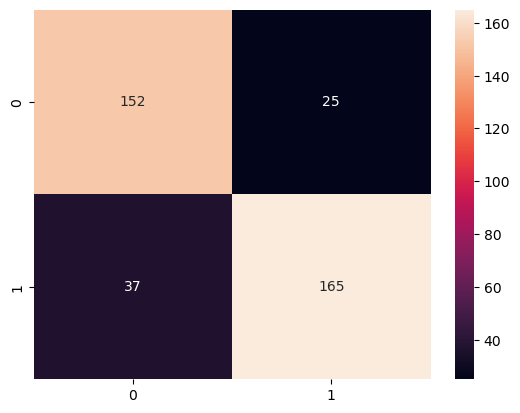

In [35]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [36]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       177
         1.0       0.87      0.82      0.84       202

    accuracy                           0.84       379
   macro avg       0.84      0.84      0.84       379
weighted avg       0.84      0.84      0.84       379



# Gracias